# COVID 19 Analysis


I stole some of this from Brice R -- who did a nice job confirming exponential growth of virus confirmed cases.  See (https://ro-z.net/assets/covid19quickanalysis.html)

I am throwing in analysis of my local target US states + the hot countries Spain, Italy, etc to compare and contrast.

Datasets are all available on github courtesy of John Hopkins, just download via:

-  git clone https://github.com/CSSEGISandData/COVID-19.git


In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

drdir = 'COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/'
tsdir = 'COVID-19/csse_covid_19_data/csse_covid_19_time_series/'

daily_f = drdir+'01-22-2020.csv' # 03-18-2020.csv etc
confirmed_f = tsdir+'time_series_19-covid-Confirmed.csv'
deaths_f = tsdir+'time_series_19-covid-Deaths.csv'
recovs_f = tsdir+'time_series_19-covid-Recovered.csv'

dfc = pd.read_csv(confirmed_f)
dfd = pd.read_csv(deaths_f)
dfr = pd.read_csv(recovs_f)

confirmed = dfc.drop(columns=['Lat','Long']).groupby( ['Country/Region']).sum().transpose()
confirmed.index = pd.to_datetime(confirmed.index)

dfd = pd.read_csv(deaths_f)
deaths = dfd.drop(columns=['Lat','Long']).groupby( ['Country/Region']).sum().transpose()
deaths.index = pd.to_datetime(deaths.index)


In [246]:
display(dfc.head())
display(dfr.head())
display(dfd.head())


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,53,59,70,75,82,114,147,177,212,272.0
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,581,639,639,701,773,839,825,878,889,924.0
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,160,178,178,200,212,226,243,266,313,345.0
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1.0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,129,149,149,197,238,428,566,673,790,900.0


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,2,2,...,33,34,34,35,35,35,35,41,42,42.0
1,NaN,Japan,36.0000,138.0000,0,0,0,0,1,1,...,101,118,118,118,118,118,144,144,144,150.0
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,78,96,96,97,105,105,109,114,114,114.0
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1.0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,24,26,26,26,35,42,42,49,60,75.0


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1.0
1,NaN,Japan,36.0000,138.0000,0,0,0,0,0,0,...,10,15,16,19,22,22,27,29,29,29.0
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2,2.0


In [247]:
confirmed = dfc.drop(columns=['Lat','Long']).groupby( ['Country/Region']).sum().transpose()
confirmed.index = pd.to_datetime(confirmed.index)

dfd = pd.read_csv(deaths_f)
deaths = dfd.drop(columns=['Lat','Long']).groupby( ['Country/Region']).sum().transpose()
deaths.index = pd.to_datetime(deaths.index)

confirmed.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,...,Turkey,US,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,Zambia
2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0


In [248]:
countries = [ 'Japan', 'US', 'Italy', 'Spain','France', 'Korea, South' ]
deaths[ countries ].tail()


Country/Region,Japan,US,Italy,Spain,France,"Korea, South"
2020-03-15,22.0,63.0,1809.0,289.0,91.0,75.0
2020-03-16,27.0,85.0,2158.0,342.0,148.0,75.0
2020-03-17,29.0,108.0,2503.0,533.0,148.0,81.0
2020-03-18,29.0,118.0,2978.0,623.0,148.0,84.0
2020-03-19,29.0,200.0,3405.0,830.0,243.0,91.0


## Views by Country

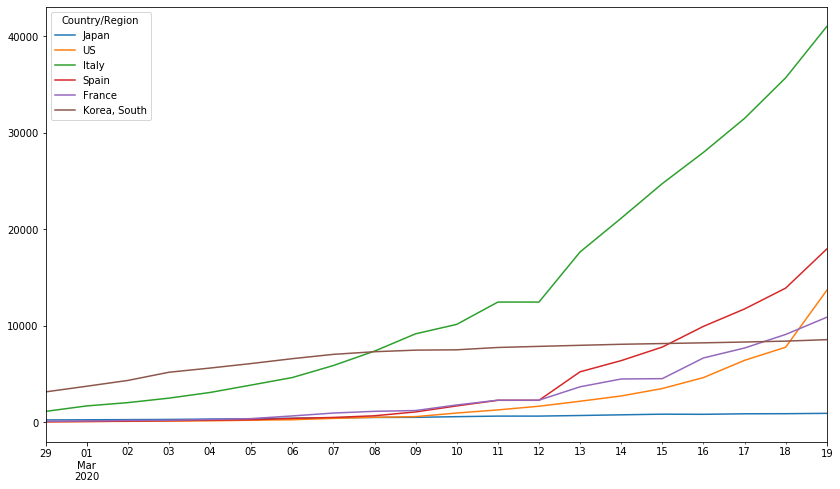

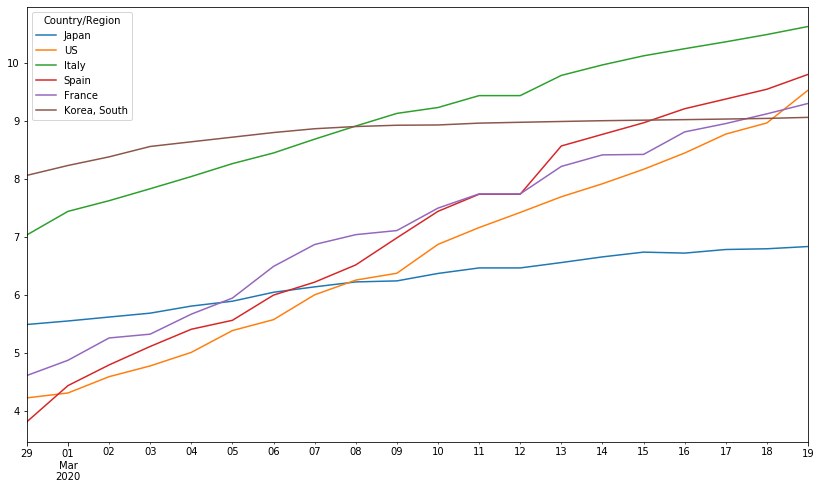

In [249]:
confirmed[ countries ].tail(20).plot(figsize=(14,8))
confirmed[ countries ].apply(np.log).tail(20).plot(figsize=(14,8))

## US Specific Analysis

One problem is lack of consistent City/State/County info -- some data is by State, most by County.

In [250]:
confirmed_us = dfc[ dfc['Country/Region'] == 'US']
confirmed_us

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20
98,Washington,US,47.4009,-121.4905,0,0,0,0,0,0,...,267,366,442,568,572,643,904,1076,1014,1376.0
99,New York,US,42.1657,-74.9481,0,0,0,0,0,0,...,173,220,328,421,525,732,967,1706,2495,5365.0
100,California,US,36.1162,-119.6816,0,0,0,0,0,0,...,144,177,221,282,340,426,557,698,751,952.0
101,Massachusetts,US,42.2302,-71.5301,0,0,0,0,0,0,...,92,95,108,123,138,164,197,218,218,328.0
102,Diamond Princess,US,35.4437,139.6380,0,0,0,0,0,0,...,46,46,46,46,46,46,47,47,47,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,Puerto Rico,US,18.2208,-66.5901,0,0,0,0,0,0,...,0,0,0,0,3,5,5,5,5,5.0
431,Guam,US,13.4443,144.7937,0,0,0,0,0,0,...,0,0,0,0,0,3,3,3,5,12.0
450,Virgin Islands,US,18.3358,-64.8963,0,0,0,0,0,0,...,0,0,0,0,1,1,1,2,2,3.0
470,United States Virgin Islands,US,18.3500,-64.9330,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.0


In [251]:
confirmed_us = dfc[ dfc['Country/Region'] == 'US']
states = [x for x in list(confirmed_us['Province/State']) if 'NC' in x or 'North Carolina' in x]
states


['North Carolina', 'Camden, NC', 'Chatham County, NC', 'Wake County, NC']

In [252]:
# merge to NC
nc1 = confirmed_us[confirmed_us['Province/State'].isin( states )].drop(columns=['Lat', 'Long'])
nc1[ 'Province/State' ] = 'North Carolina'
nc = nc1.groupby( 'Province/State' ).sum().transpose()
nc.tail()

Province/State,North Carolina
3/15/20,33.0
3/16/20,38.0
3/17/20,64.0
3/18/20,70.0
3/19/20,123.0


In [253]:
def findState(df, statefull, stateshort):
    states = [x for x in list(df['Province/State']) if stateshort in x or statefull == x]
    return states

def extractState(df, statefull, stateshort):
    states = FindState(df,statefull,stateshort)
    pre = df[ df[ 'Province/State'].isin(states)].drop(columns=['Lat','Long'])
    pre['Province/State'] = statefull
    return pre.groupby('Province/State').sum().transpose()

In [254]:
# mix of countys and state
for state,code in [('New York','NY'), ('New Jersey','NJ'), ('North Carolina','NC'), ('California','CA'), ('Texas','TX'), ('Delaware','DE')]:
    display(findState(confirmed_us, state, code))


['New York',
 'Suffolk County, NY',
 'Ulster County, NY',
 'Rockland County, NY',
 'Saratoga County, NY',
 'Nassau County, NY',
 'New York County, NY',
 'Westchester County, NY']

['New Jersey',
 'Monmouth, NJ',
 'Burlington, NJ',
 'Camden, NJ',
 'Passaic, NJ',
 'Union, NJ',
 'Hudson County, NJ',
 'Bergen County, NJ',
 'Middlesex, NJ']

['North Carolina', 'Camden, NC', 'Chatham County, NC', 'Wake County, NC']

['California',
 'Solano, CA',
 'Santa Cruz, CA',
 'Napa, CA',
 'Ventura, CA',
 'Shasta County, CA',
 'Fresno County, CA',
 'Riverside County, CA',
 'Alameda County, CA',
 'Madera County, CA',
 'Yolo County, CA',
 'Santa Clara County, CA',
 'San Francisco County, CA',
 'Contra Costa County, CA',
 'Orange County, CA',
 'Placer County, CA',
 'San Mateo, CA',
 'Sonoma County, CA',
 'Humboldt County, CA',
 'Sacramento County, CA',
 'San Diego County, CA',
 'San Benito, CA',
 'Los Angeles, CA',
 'Marin, CA',
 'Calaveras, CA',
 'Stanislaus, CA',
 'San Joaquin, CA']

['Texas',
 'Gregg, TX',
 'Collin County, TX',
 'Fort Bend County, TX',
 'Harris County, TX',
 'Dallas, TX',
 'Tarrant, TX',
 'Montgomery, TX']

['Delaware', 'New Castle, DE']

In [255]:
confirmed_st = extractState(confirmed_us, 'Texas', 'TX')
confirmed_st['New York'] = ExtractState(confirmed_us, 'New York', 'NY')
confirmed_st['California'] = ExtractState(confirmed_us, 'California', 'CA')
confirmed_st['North Carolina'] = ExtractState(confirmed_us, 'North Carolina', 'NC')
confirmed_st['New Jersey'] = ExtractState(confirmed_us, 'New Jersey', 'NJ')

confirmed_st['Japan'] = confirmed['Japan']
confirmed_st['Spain'] = confirmed['Spain']
confirmed_st['Italy'] = confirmed['Italy']
confirmed_st['France'] = confirmed['France']
confirmed_st['Korea, South'] = confirmed['Korea, South']
confirmed_st['US'] = confirmed['US']

confirmed_st.tail()

Province/State,Texas,New York,California,North Carolina,New Jersey,Japan,Spain,Italy,France,"Korea, South",US
3/15/20,72.0,732.0,426.0,33.0,98.0,839.0,7798.0,24747.0,4523.0,8162.0,3499.0
3/16/20,85.0,967.0,557.0,38.0,178.0,825.0,9942.0,27980.0,6668.0,8236.0,4632.0
3/17/20,110.0,1706.0,698.0,64.0,267.0,878.0,11748.0,31506.0,7699.0,8320.0,6421.0
3/18/20,173.0,2495.0,751.0,70.0,267.0,889.0,13910.0,35713.0,9105.0,8413.0,7783.0
3/19/20,260.0,5365.0,952.0,123.0,742.0,924.0,17963.0,41035.0,10886.0,8565.0,13680.0


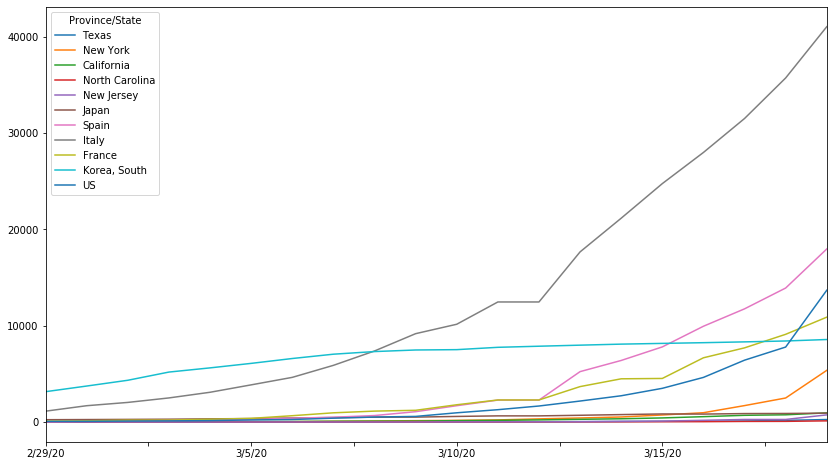

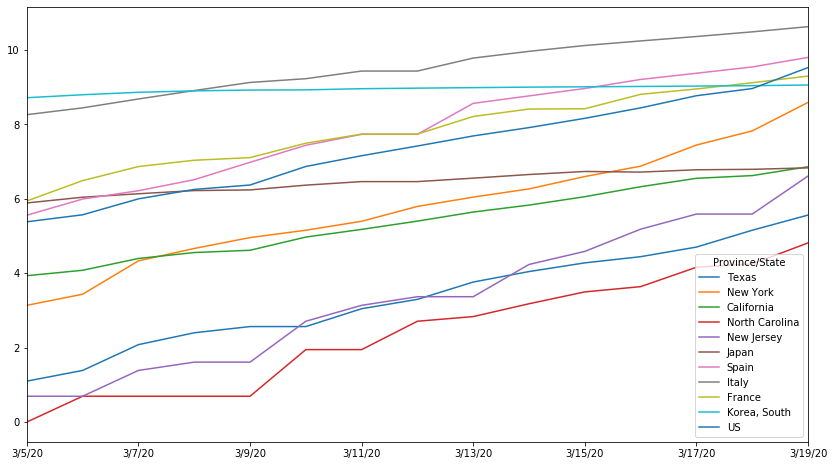

In [256]:
confirmed_st.tail(20).plot(figsize=(14,8))
confirmed_st.apply(np.log).tail(15).plot(figsize=(14,8))

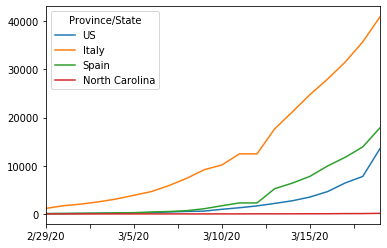

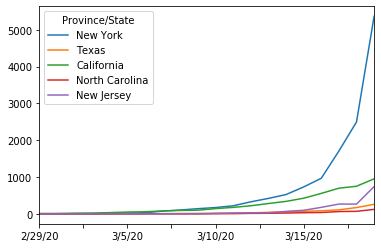

In [257]:
confirmed_st[['US','Italy','Spain','North Carolina']].tail(20).plot()
confirmed_st[['New York','Texas','California','North Carolina','New Jersey']].tail(20).plot()

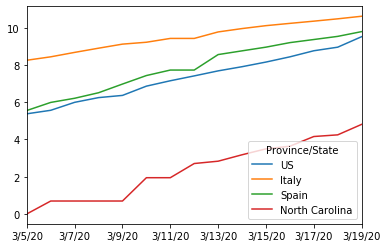

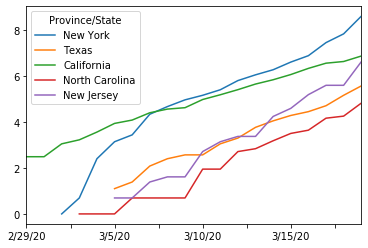

In [258]:
confirmed_st[['US','Italy','Spain','North Carolina']].apply(np.log).tail(15).plot()
confirmed_st[['New York','Texas','California','North Carolina','New Jersey']].apply(np.log).tail(20).plot()


# Maps Geo Views

get the packages
- geopandas
- shapely
- descartes

Download maps: 
- arcgis - https://www.arcgis.com/home/item.html?id=f7f805eb65eb4ab787a0a3e1116ca7e5

Using daily datasets (only by US state, no city/county info)
- drdir = 'COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/'
- daily_f = drdir+'01-22-2020.csv' # 03-18-2020.csv etc

Better to stick w/ timeseries if we want city/county data ? 

In [259]:
drdir = 'COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/'
daily_f = drdir+'03-19-2020.csv' # 03-18-2020.csv etc

daily_confirmed = pd.read_csv(daily_f)

daily_confirmed[daily_confirmed['Province/State'].isin(['North Carolina', 'Camden, NC', 'Chatham County, NC', 'Wake County, NC'])]


,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
97,North Carolina,US,2020-03-19T23:43:04,123,0,0,35.6301,-79.8064


## Geo w/ timeseries data

Timeseries data looks odd -- looking at NC data 3/1 to 3/15 shows data issues.  You would expect county #'s of confirmed to remain then roll into death or recovered, but it doesn't.  The case just goes to 0 without explanation.. sigh.. more bad data!
 
### Note this map data is bad, it uses incorrect timeseries locations which aren't complete.

In [260]:
confirmed_us2 = confirmed_us

print('confirmed')
display(pd.concat([confirmed_us2.iloc[:,0:1], confirmed_us2.iloc[:,40:55]], axis=1)[confirmed_us['Province/State'].
                             isin(['North Carolina', 'Camden, NC', 'Chatham County, NC', 'Wake County, NC'])])

print('deceased')
display(pd.concat([dfd.iloc[:,0:1], dfd.iloc[:,40:55]], axis=1)[dfd['Province/State'].
                             isin(['North Carolina', 'Camden, NC', 'Chatham County, NC', 'Wake County, NC'])])

print('recovered')
display(pd.concat([dfr.iloc[:,0:1], dfr.iloc[:,40:55]], axis=1)[dfr['Province/State'].
                             isin(['North Carolina', 'Camden, NC', 'Chatham County, NC', 'Wake County, NC'])])

# hack ways to exclude non-48, the data has some outliers to remove
confirmed_us2 = confirmed_us2[confirmed_us2['Long'] > -130]  # hawaii
confirmed_us2 = confirmed_us2[confirmed_us2['Long'] < -75]   # up to new york
confirmed_us2 = confirmed_us2[confirmed_us2['Lat'] < 50]  # below canada
confirmed_us2 = confirmed_us2[confirmed_us2['Lat'] > 22]  # above texas



confirmed


,Province/State,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20
114,North Carolina,0,0,0,0,0,0,0,0,0,0,0,0,7,7,15
238,"Camden, NC",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
302,"Chatham County, NC",0,0,0,0,0,0,0,0,1,1,1,1,0,0,0
331,"Wake County, NC",0,0,0,0,0,1,1,1,1,1,1,1,0,0,0


deceased


,Province/State,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20
114,North Carolina,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
238,"Camden, NC",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
302,"Chatham County, NC",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
331,"Wake County, NC",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


recovered


,Province/State,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20
114,North Carolina,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
238,"Camden, NC",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
302,"Chatham County, NC",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
331,"Wake County, NC",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


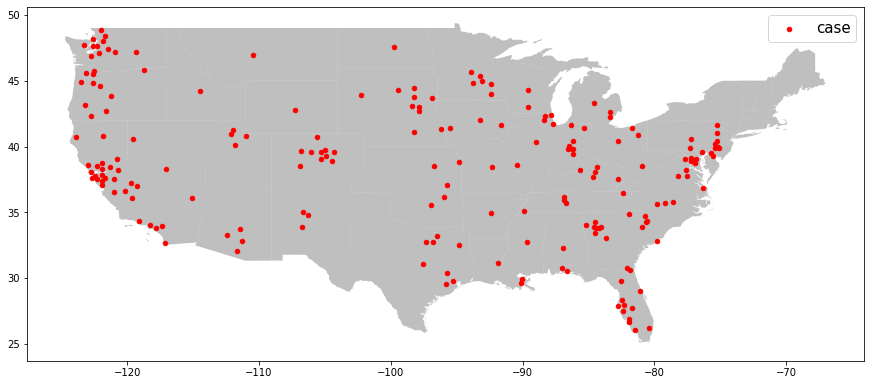

In [261]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

usa = gpd.read_file('maps/states.shp')

geometry = [Point(xy) for xy in zip(confirmed_us2["Long"],confirmed_us2["Lat"]) ] 
geo_df = gpd.GeoDataFrame(confirmed_us2,crs={"init": "epsg:4326"},geometry=geometry)
geo_df = geo_df[['Province/State','3/18/20','geometry']]

# display(usa[0:3])
# display(geo_df)

fig, ax = plt.subplots(figsize=(15,15))

cusa = usa[~usa['STATE_NAME'].isin(['Hawaii','Alaska'])]
cusa.plot(ax=ax, alpha=0.5, color='grey')

geo_df.plot(ax=ax, markersize=20, color='red', label='case')
plt.legend(prop={'size': 15})

In [263]:
fips_df = pd.read_csv('maps/safegraph_open_census_data/metadata/cbg_fips_codes.csv')
cgeo_df = pd.read_csv('maps/safegraph_open_census_data/metadata/cbg_geographic_data.csv')

#first 5 digits are fips state+county

display(fips_df.head())
display(cgeo_df.head())



,state,state_fips,county_fips,county,class_code
0,AL,1,1,Autauga County,H1
1,AL,1,3,Baldwin County,H1
2,AL,1,5,Barbour County,H1
3,AL,1,7,Bibb County,H1
4,AL,1,9,Blount County,H1


,census_block_group,amount_land,amount_water,latitude,longitude
0,10010201001,4254524.0,23431,32.465829,-86.489614
1,10010201002,5568295.0,0,32.485849,-86.489690
2,10010202001,2058380.0,0,32.480082,-86.474974
3,10010202002,1283506.0,5968,32.464435,-86.469766
4,10010203001,3866515.0,9054,32.480175,-86.460793


# North Carolina Info

,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20
114,0,0,0,0,0,0,0,0,0,0,0,0,7,7,15
238,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
302,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0
331,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0


,Province/State,3/18/20,geometry
114,North Carolina,70,POINT (-79.80640 35.63010)
238,"Camden, NC",0,POINT (-80.60700 34.24650)
302,"Chatham County, NC",0,POINT (-79.17810 35.72110)
331,"Wake County, NC",0,POINT (-78.56610 35.80320)


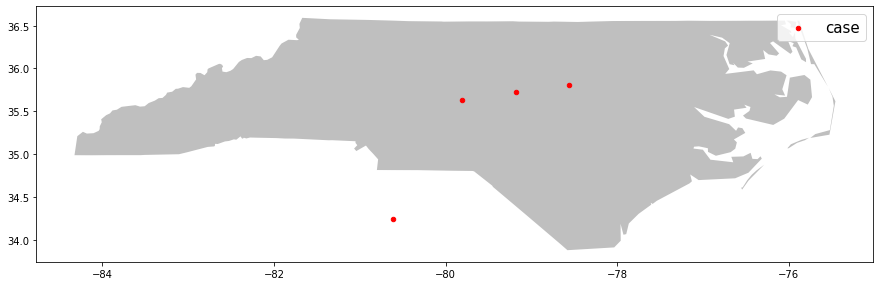

In [262]:
confirmed_nc = confirmed_us[confirmed_us['Province/State'].
                             isin(['North Carolina', 'Camden, NC', 'Chatham County, NC', 'Wake County, NC'])]
display(confirmed_nc.iloc[:,40:55])

fig, ax = plt.subplots(figsize=(15,15))

cusa = usa[usa['STATE_NAME'].isin(['North Carolina'])]
cusa.plot(ax=ax, alpha=0.5, color='grey')
geo_df = geo_df[geo_df['Province/State'].
                             isin(['North Carolina', 'Camden, NC', 'Chatham County, NC', 'Wake County, NC'])]
display(geo_df)
geo_df.plot(ax=ax, markersize=20, color='red', label='case')
plt.legend(prop={'size': 15})